In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%load_ext sql

In [2]:
# Color Dictionary
keys = ["red", "salmon","tan",'light_green','aqua_green','purple']
values = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']
color_dct = dict(zip(keys, values))

color_dct['red']

'#FF9AA2'

In [3]:
yrs = ['yr_2013', 'yr_2014', 'yr_2015', 'yr_2016', 'yr_2017', 'yr_2018', 'yr_2019', 'yr_2020']
# yrs = ['yr_2013', 'yr_2020']

yr_rides = []

for yr in yrs:
    %sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
    temp = %sql SELECT count(*) FROM $yr;
    print(yr)
    count = temp.DataFrame()
    count = count.values.flatten()[0]
    yr_rides.append(count)
    del count

yr_rides

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2013
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2014
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2015
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2016
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2017
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2018
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2019
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
Done.
yr_2020


[5614888, 8081216, 9990852, 14093239, 16659585, 17902231, 20956644, 5727581]

In [4]:
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [11]:
df_rides = pd.DataFrame(years)
df_rides['Number of Rides'] = yr_rides
df_rides.rename(columns={0:'Year'}, inplace=True)
df_rides['Year'] = df_rides['Year'].astype(int)
df_rides

,Year,Number of Rides
0,2013,5614888
1,2014,8081216
2,2015,9990852
3,2016,14093239
4,2017,16659585
5,2018,17902231
6,2019,20956644
7,2020,5727581


In [12]:
df_op = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/operating_reports/operations_v2.csv')

df_op['Year'] = df_op['Year'].astype(int)
df_op.sort_values(by=['Year'], inplace=True)
df_op['Year_datetime'] = pd.to_datetime(df_op['Year'].astype(str), format='%Y')

# df_op.head(2)

In [13]:
df_op = pd.merge(df_op, df_rides, left_on='Year', right_on='Year')
# df_op.drop(columns=['Year'], inplace=True)
df_op.set_index('Year_datetime', inplace=True)
df_op

,Year,Annual Membership,Casual Membership,Annual Overages,Casual Overages,Other Revenue,Refunds & Discounts,Tax,Sponsorship,Number of Rides
Year_datetime,,,,,,,,,,
2013-01-01,2013,9131875.00,3988089.00,641897.00,1665693.00,60189.00,-1189585.00,0.00,11686000.00,5614888
2015-01-01,2015,12025114.00,4851137.00,1604681.00,4074143.00,654873.00,-2778021.00,1955996.00,12702686.00,9990852
2016-01-01,2016,18475590.00,6545247.00,1957558.00,4175177.00,562724.00,-3251893.00,2541333.00,9598250.00,14093239
2017-01-01,2017,24780176.00,6313352.00,2047137.00,3160965.00,308222.00,-3796836.00,2894826.00,11292597.00,16659585
2018-01-01,2018,24453578.50,7638695.85,652143.23,3434267.87,655312.11,-2816420.23,3046686.87,16417149.06,17902231
2019-01-01,2019,24733535.16,10739976.92,708732.73,3666030.87,462360.19,-3040026.27,3269940.90,11182175.38,20956644


In [14]:
df = df_op.copy()
df['Minor Revenue Sources'] = df['Other Revenue'] + df['Tax']
df.drop(columns=['Other Revenue','Tax'], inplace=True)
df['Overages'] = df['Casual Overages'] + df['Annual Overages']
df.drop(columns=['Casual Overages','Annual Overages'], inplace=True)
df.drop(columns=['Refunds & Discounts'], inplace=True)
df = df[['Year','Annual Membership', 'Sponsorship', 'Casual Membership', 'Overages', 'Minor Revenue Sources', 'Number of Rides']]
df['Total Revenue'] = df['Annual Membership'] + df['Sponsorship'] + df['Casual Membership'] + df['Overages'] + df['Minor Revenue Sources']
df['Sponsorship Per Ride'] = df['Sponsorship'] / df['Number of Rides']
df

,Year,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Number of Rides,Total Revenue,Sponsorship Per Ride
Year_datetime,,,,,,,,,
2013-01-01,2013,9131875.00,11686000.00,3988089.00,2307590.0,60189.00,5614888,27173743.00,2.081253
2015-01-01,2015,12025114.00,12702686.00,4851137.00,5678824.0,2610869.00,9990852,37868630.00,1.271432
2016-01-01,2016,18475590.00,9598250.00,6545247.00,6132735.0,3104057.00,14093239,43855879.00,0.681054
2017-01-01,2017,24780176.00,11292597.00,6313352.00,5208102.0,3203048.00,16659585,50797275.00,0.677844
2018-01-01,2018,24453578.50,16417149.06,7638695.85,4086411.1,3701998.98,17902231,56297833.49,0.917045
2019-01-01,2019,24733535.16,11182175.38,10739976.92,4374763.6,3732301.09,20956644,54762752.15,0.533586


In [15]:
df.to_csv('regression.csv')

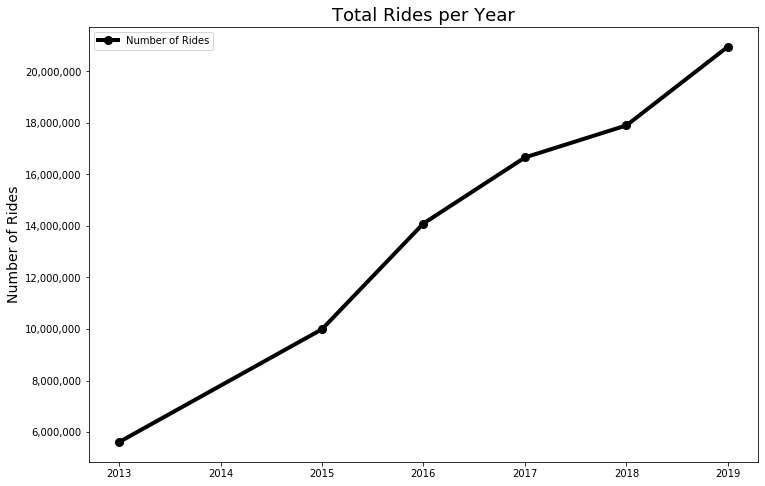

In [10]:
from matplotlib.pyplot import figure
import matplotlib.ticker as tkr

figure(figsize=(12, 8))

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax1 = plt.plot( df.index.values, df[['Number of Rides']], marker='o',markersize=8,
         color='k', linewidth=4, label='Number of Rides')

plt.xlabel('') 
plt.ylabel('Number of Rides',size=14)
plt.title('Total Rides per Year',size=18)

plt.legend(loc=2)
# plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('total_rides.png') 
plt.show()

#
#y = 2,575,399.29x - 5,178,660,519.93 
# R² = 0.99



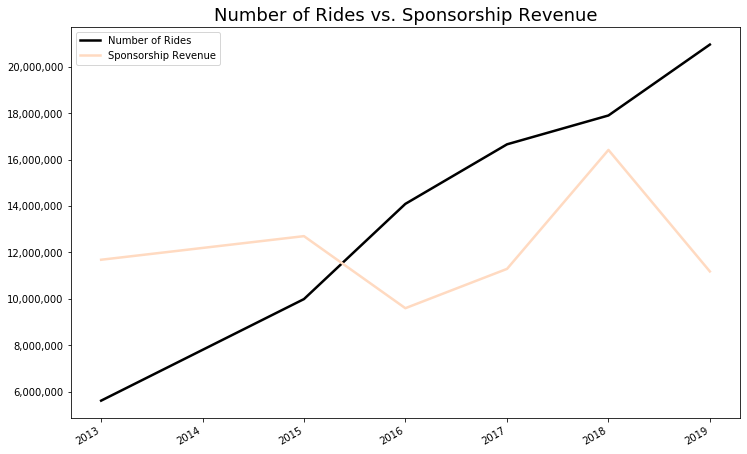

In [34]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr

# figure(figsize=(12, 8))

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter


plt.figure(figsize=(12,8))

plt.title('Number of Rides vs. Sponsorship Revenue', fontsize=18)

ax1 = df['Number of Rides'].plot(color='k', label='Number of Rides', linewidth=2.5)
ax2 = df["Sponsorship"].plot(color=color_dct['tan'], label="Sponsorship Revenue", linewidth=2.5) #, secondary_y=True

# ax1.set_ylabel('Number of Rides', color='k', fontsize=18, weight='bold')
# ax2.set_ylabel('Sponsorship Revenue ($)', color=color_dct['tan'], fontsize=18, weight='bold')

ax1.yaxis.set_major_formatter(y_format)  # set formatter to needed axis
ax2.yaxis.set_major_formatter(y_format)  # set formatter to needed axis
# ax1.tick_params(axis='y', colors=color_dct['purple'], labelsize=14)#, weight='bold')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

linestyles = ['-', '--', '-.', ':']
# plt.axhline(y=12000000, linewidth=2, color=color_dct['aqua_green'], ls=linestyles[1])

plt.legend() #h1+h2, loc=2, l1+l2

plt.xlabel('')

plt.savefig('Rides_vs_Sponsorship.png') 

plt.show()

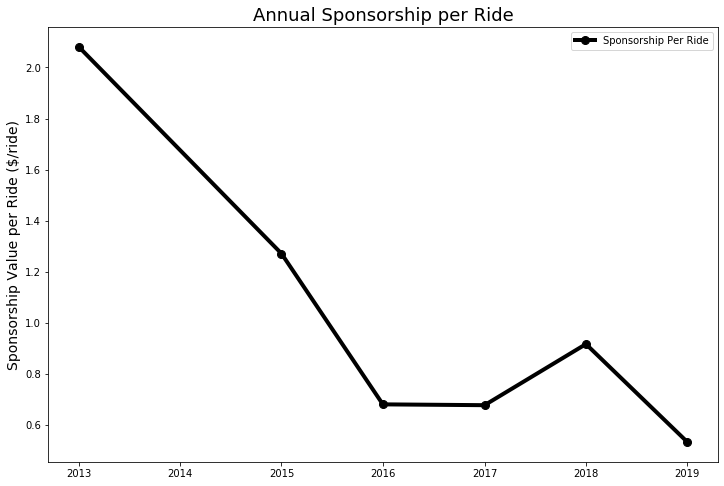

In [12]:
from matplotlib.pyplot import figure
# import matplotlib.ticker as tkr

figure(figsize=(12, 8))

# def func(x, pos):  # formatter function takes tick label and tick position
#     s = '%d' % x
#     groups = []
#     while s and s[-1].isdigit():
#         groups.append(s[-3:])
#         s = s[:-3]
#     return s + ','.join(reversed(groups))

# y_format = tkr.FuncFormatter(func)  # make formatter

ax = plt.subplot(111)
# ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax1 = plt.plot( df.index.values, df[['Sponsorship Per Ride']], marker='o',markersize=8,
         color='k', linewidth=4, label='Sponsorship Per Ride')

plt.xlabel('') 
plt.ylabel('Sponsorship Value per Ride ($/ride)',size=14)
plt.title('Annual Sponsorship per Ride',size=18)

plt.legend(loc=1)
# plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('sponsorship_per_ride.png') 
plt.show()

#
#y = 2,575,399.29x - 5,178,660,519.93 
# R² = 0.99



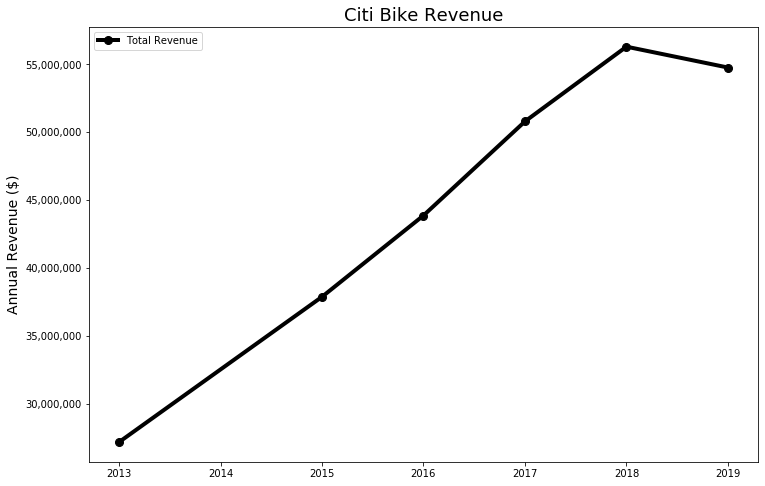

In [13]:
from matplotlib.pyplot import figure
import matplotlib.ticker as tkr

figure(figsize=(12, 8))

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax1 = plt.plot( df.index.values, df[['Total Revenue']], marker='o',markersize=8,
         color='k', linewidth=4, label='Total Revenue')

plt.xlabel('') 
plt.ylabel('Annual Revenue ($)',size=14)
plt.title('Citi Bike Revenue',size=18)

plt.legend(loc=2)
# plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('total_revenue.png') 
plt.show()


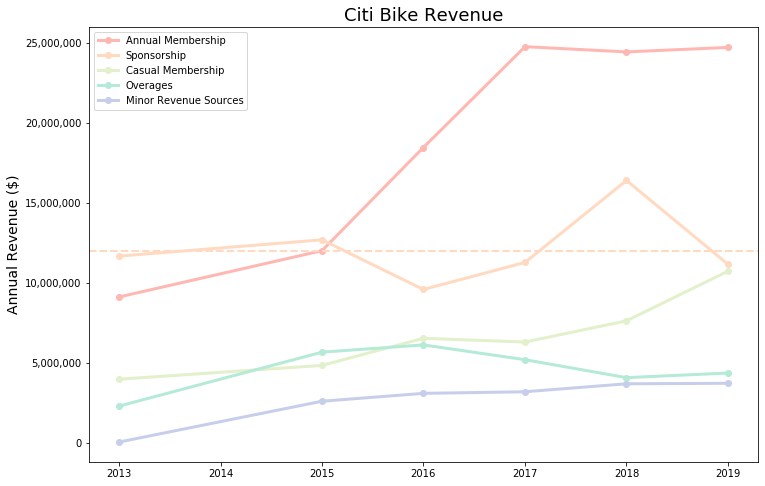

In [86]:
from matplotlib.pyplot import figure
import matplotlib.ticker as tkr

figure(figsize=(12, 8))

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax1 = plt.plot( df.index.values, df[['Annual Membership']], marker='o',
         color=color_dct["salmon"], linewidth=3, label='Annual Membership')

ax2 = plt.plot( df.index.values, df[['Sponsorship']], marker='o',
         color=color_dct["tan"], linewidth=3, label='Sponsorship')

ax3 = plt.plot( df.index.values, df[['Casual Membership']], marker='o',
         color=color_dct["light_green"], linewidth=3, label='Casual Membership')

ax4 = plt.plot( df.index.values, df[['Overages']], marker='o',
         color=color_dct["aqua_green"], linewidth=3, label='Overages')


ax5 = plt.plot( df.index.values, df[['Minor Revenue Sources']], marker='o',
         color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')


plt.xlabel('') 
plt.ylabel('Annual Revenue ($)',size=14)
plt.title('Citi Bike Revenue',size=18)

linestyles = ['-', '--', '-.', ':']
plt.axhline(y=12000000, linewidth=2, color=color_dct['tan'], ls=linestyles[1])

plt.legend(loc=2)
# plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('revenue_by_source.png') 
plt.show()

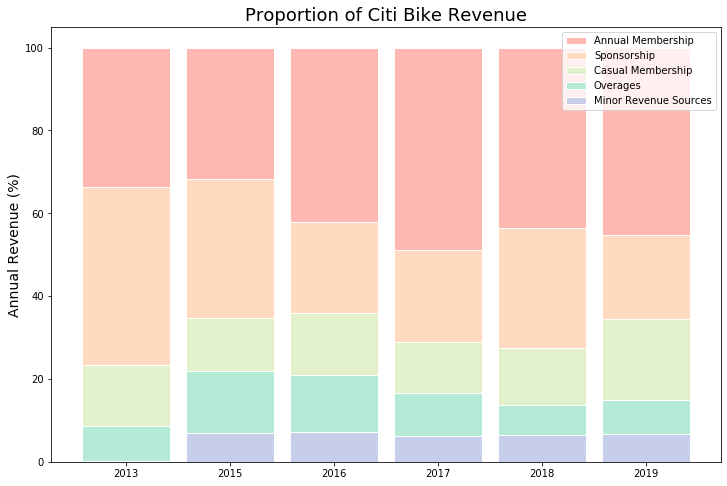

In [15]:
from matplotlib import rc

figure(figsize=(12, 8))

r = np.arange(1,df.shape[0]+1)
# r = [0,1,2,3,4]

ax = plt.subplot(111)

# From raw value to percentage
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Annual Membership'],
                                     df['Sponsorship'],
                                     df['Casual Membership'],
                                     df['Overages'],
                                     df['Minor Revenue Sources'])]
n_top = [i / j * 100 for i,j in zip(df['Annual Membership'], totals)]
n_top_1 = [i / j * 100 for i,j in zip(df['Sponsorship'], totals)]
n_top_2 = [i / j * 100 for i,j in zip(df['Casual Membership'], totals)]
n_top_3 = [i / j * 100 for i,j in zip(df['Overages'], totals)]
n_top_4 = [i / j * 100 for i,j in zip(df['Minor Revenue Sources'], totals)]

keys = ["red", "salmon","tan",'light_green','aqua_green','purple']

# plot
barWidth = 0.85
names = ('2013','2015','2016','2017','2018', '2019')
# Create green Bars
plt.bar(r, n_top_4, color=color_dct['purple'], edgecolor='white', width=barWidth,
        label="Minor Revenue Sources")
# Create orange Bars
plt.bar(r, n_top_3, bottom=n_top_4, color=color_dct['aqua_green'], edgecolor='white', width=barWidth,
        label='Overages')
# Create blue Bars
plt.bar(r, n_top_2, bottom=[i+j for i,j in zip(n_top_3, n_top_4)], color=color_dct['light_green'], edgecolor='white', width=barWidth,
        label='Casual Membership')
# 
plt.bar(r, n_top_1, bottom=[i+j+k for i,j,k in zip(n_top_2, n_top_3, n_top_4)], color=color_dct['tan'], edgecolor='white', width=barWidth,
        label='Sponsorship')
# 
plt.bar(r, n_top, bottom=[i+j+k+l for i,j,k,l in zip(n_top_1, n_top_2, n_top_3, n_top_4)], color=color_dct['salmon'], edgecolor='white', width=barWidth,
        label='Annual Membership')

# Custom x axis
plt.xticks(r, names)
plt.xlabel("")
plt.ylabel('Annual Revenue (%)',size=14)
plt.title('Proportion of Citi Bike Revenue',size=18)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='', loc='upper right')

# plt.legend(loc=1)
# Show graphic
plt.savefig('revenue_by_source_proportion.png') 
plt.show()


In [16]:
df.columns.to_list()

['Year',
 'Annual Membership',
 'Sponsorship',
 'Casual Membership',
 'Overages',
 'Minor Revenue Sources',
 'Total Revenue']

In [16]:
col_names_mod = df.columns.to_list()
df_growth = df.copy()

for col in col_names_mod:

    growth_rate_lst = [np.nan]

    for i in np.arange(1,df.shape[0]):
        growth_rate_lst.append( 100 * ((df[col][i] - df[col][i-1]) / ( df[col][i] * (df['Year'][i] - df['Year'][i-1]) ) ) )
    
    df_growth[col] = growth_rate_lst
    growth_rate_lst.clear()

df_growth = df_growth[1:]

In [17]:
df_growth

,Year,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Number of Rides,Total Revenue,Sponsorship Per Ride
Year_datetime,,,,,,,,,
2015-01-01,0.049628,12.029986,4.001854,8.895317,29.682501,48.847338,21.899854,14.121038,-31.846809
2016-01-01,0.049603,34.913505,-32.343771,25.883057,7.401445,15.888497,29.108901,13.652101,-86.686020
2017-01-01,0.049579,25.442055,15.004051,-3.673088,-17.753742,3.090525,15.404621,13.664898,-0.473514
2018-01-01,0.049554,-1.335582,31.214628,17.350394,-27.449292,13.477880,6.941291,9.770462,26.083896
2019-01-01,0.049529,1.131891,-46.815342,28.876050,6.591270,0.811888,14.574915,-2.803149,-71.864438


In [18]:
df_growth.to_csv('regression_percent_growth.csv')

In [25]:
df_growth.index.values

array(['2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

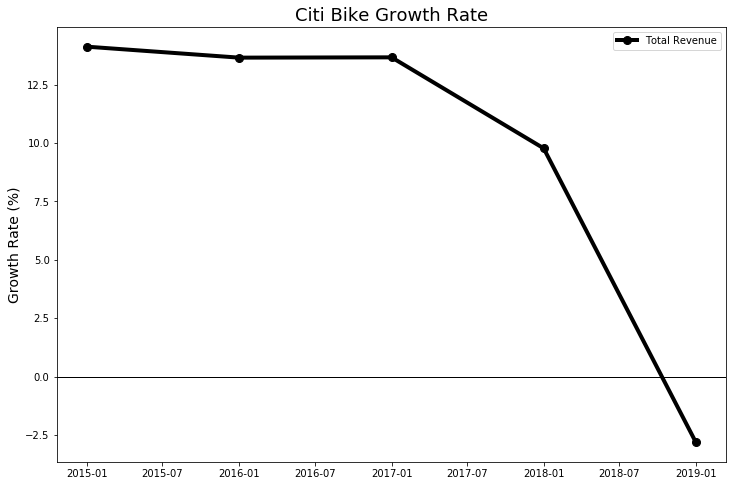

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))


# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Total Revenue']], marker='o',markersize=8,
         color='k', linewidth=4, label='Total Revenue')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Citi Bike Growth Rate',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_total.png') 
plt.show()

In [27]:
df_growth

,Year,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Total Revenue
Year_datetime,,,,,,,
2015-01-01,0.049628,12.029986,4.001854,8.895317,29.682501,48.847338,14.121038
2016-01-01,0.049603,34.913505,-32.343771,25.883057,7.401445,15.888497,13.652101
2017-01-01,0.049579,25.442055,15.004051,-3.673088,-17.753742,3.090525,13.664898
2018-01-01,0.049554,-1.335582,31.214628,17.350394,-27.449292,13.477880,9.770462
2019-01-01,0.049529,1.131891,-46.815342,28.876050,6.591270,0.811888,-2.803149


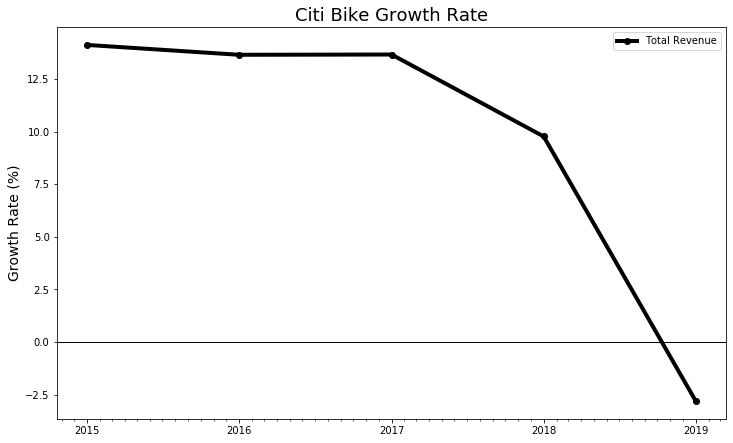

In [28]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Total Revenue']], marker='o',
         color='k', linewidth=4, label='Total Revenue')


plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Citi Bike Growth Rate',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_total.png') 
plt.show()

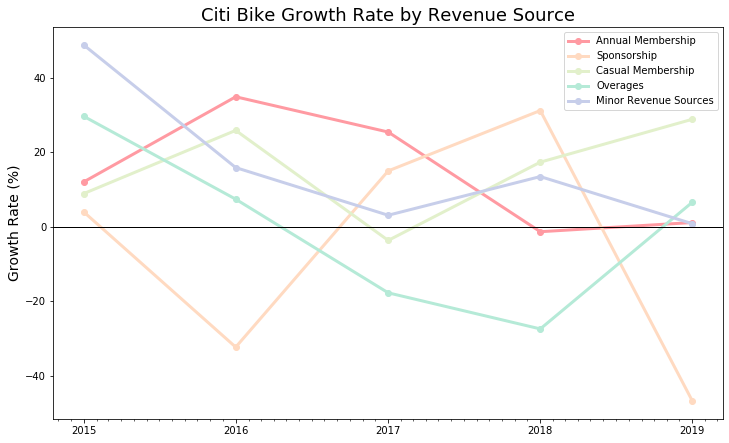

In [29]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()


# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
         color=color_dct["red"], linewidth=3, label='Annual Membership')

plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
         color=color_dct["tan"], linewidth=3, label='Sponsorship')

plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
         color=color_dct["light_green"], linewidth=3, label='Casual Membership')

plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
         color=color_dct["aqua_green"], linewidth=3, label='Overages')

plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
         color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Citi Bike Growth Rate by Revenue Source',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_source.png') 
plt.show()

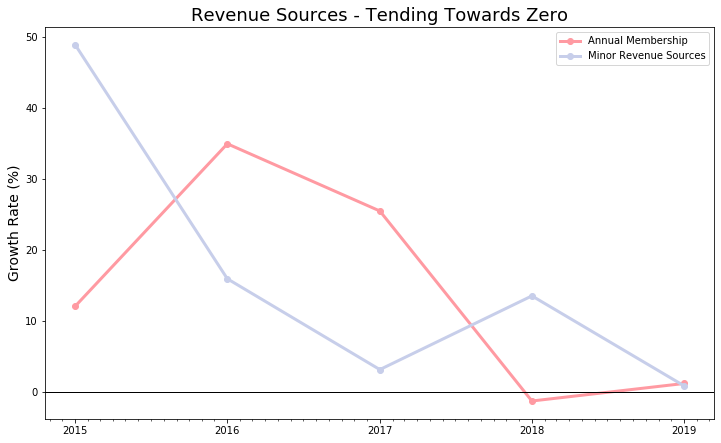

In [30]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
         color=color_dct["red"], linewidth=3, label='Annual Membership')

# plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
#          color=color_dct["tan"], linewidth=3, label='Sponsorship')

# plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
#          color=color_dct["light_green"], linewidth=3, label='Casual Membership')

# plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
#          color=color_dct["aqua_green"], linewidth=3, label='Overages')

plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
         color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Revenue Sources - Tending Towards Zero',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_towards_zero.png') 
plt.show()

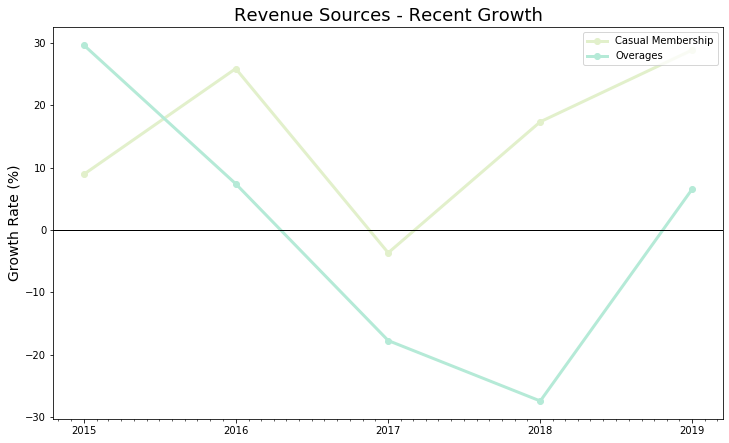

In [31]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
# ["red", "salmon","tan",'light_green','aqua_green','purple']
# plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
#          color=color_dct["red"], linewidth=3, label='Annual Membership')

# plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
#          color=color_dct["tan"], linewidth=3, label='Sponsorship')

plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
         color=color_dct["light_green"], linewidth=3, label='Casual Membership')

plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
         color=color_dct["aqua_green"], linewidth=3, label='Overages')

# plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
#          color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Revenue Sources - Recent Growth',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_recent_growth.png') 
plt.show()

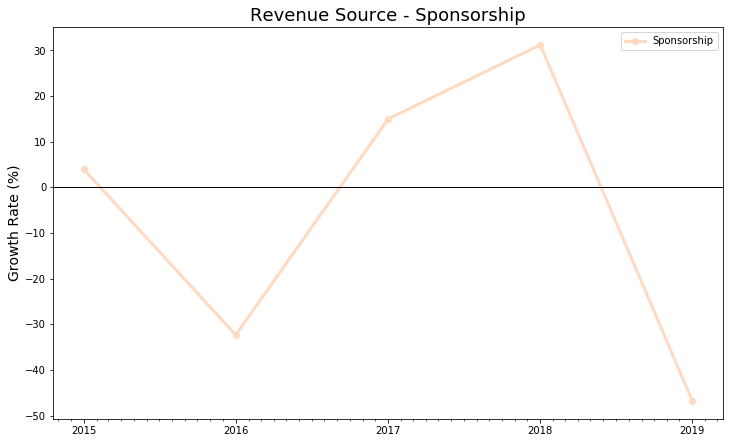

In [32]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# ["red", "salmon","tan",'light_green','aqua_green','purple']
# plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
#          color=color_dct["red"], linewidth=3, label='Annual Membership')

plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
         color=color_dct["tan"], linewidth=3, label='Sponsorship')

# plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
#          color=color_dct["light_green"], linewidth=3, label='Casual Membership')

# plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
#          color=color_dct["aqua_green"], linewidth=3, label='Overages')

# plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
#          color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Revenue Source - Sponsorship',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_sponsorship.png') 
plt.show()

In [33]:
df_growth

,Year,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Total Revenue
Year_datetime,,,,,,,
2015-01-01,0.049628,12.029986,4.001854,8.895317,29.682501,48.847338,14.121038
2016-01-01,0.049603,34.913505,-32.343771,25.883057,7.401445,15.888497,13.652101
2017-01-01,0.049579,25.442055,15.004051,-3.673088,-17.753742,3.090525,13.664898
2018-01-01,0.049554,-1.335582,31.214628,17.350394,-27.449292,13.477880,9.770462
2019-01-01,0.049529,1.131891,-46.815342,28.876050,6.591270,0.811888,-2.803149


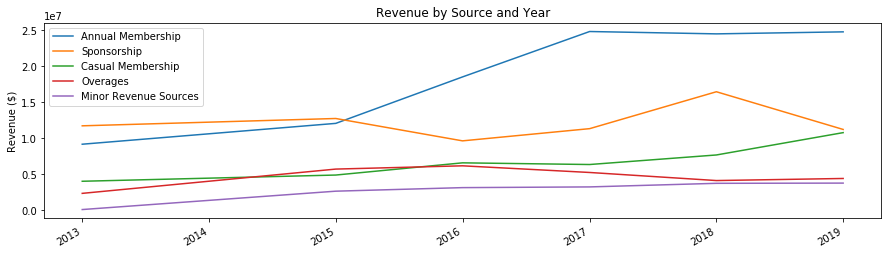

In [30]:
df_op_mod[col_names_mod].plot(figsize=(15,4))
plt.xlabel('')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Source and Year')
plt.show()

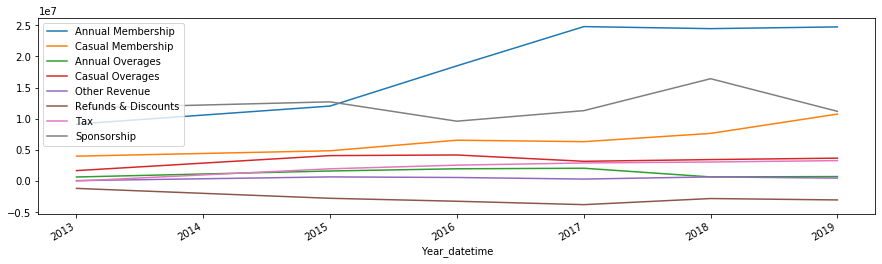

In [29]:
df_op[col_names].plot(figsize=(15,4))

In [7]:
col_names = df_op.columns.to_list()
print(len(col_names))

major_rev_sources = ['Annual Membership','Sponsorship','Casual Membership']
minor_rev_sources = ['Other Revenue','Tax']
membership_rev_sources = ['Annual Membership','Casual Membership']
overage_rev_sources = ['Casual Overages','Annual Overages']
costs = ['Refunds & Discounts']
master_list = ['Annual Membership','Sponsorship','Casual Membership'] + overage_rev_sources + minor_rev_sources + costs
len(master_list)


8


8